In [1]:
import pyforest
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("test.csv")
df.head()

<IPython.core.display.Javascript object>

,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age,default_risk_score
0,340,31745,8983,48,10.12,18.33,11,91417,56,8342.948454
1,439,115081,42051,60,3.33,31.77,6,17127,51,1710.293506
2,619,35313,6619,36,9.06,24.29,20,46761,42,8744.629774
3,664,72269,19226,48,4.29,12.50,26,64340,36,6191.771456
4,564,46292,30476,48,11.15,40.55,20,93831,50,3990.722206


In [5]:
df["default_risk_score"] = np.log(df["default_risk_score"])

<IPython.core.display.Javascript object>

In [7]:
X = df.drop(columns=["default_risk_score"])
y = df["default_risk_score"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

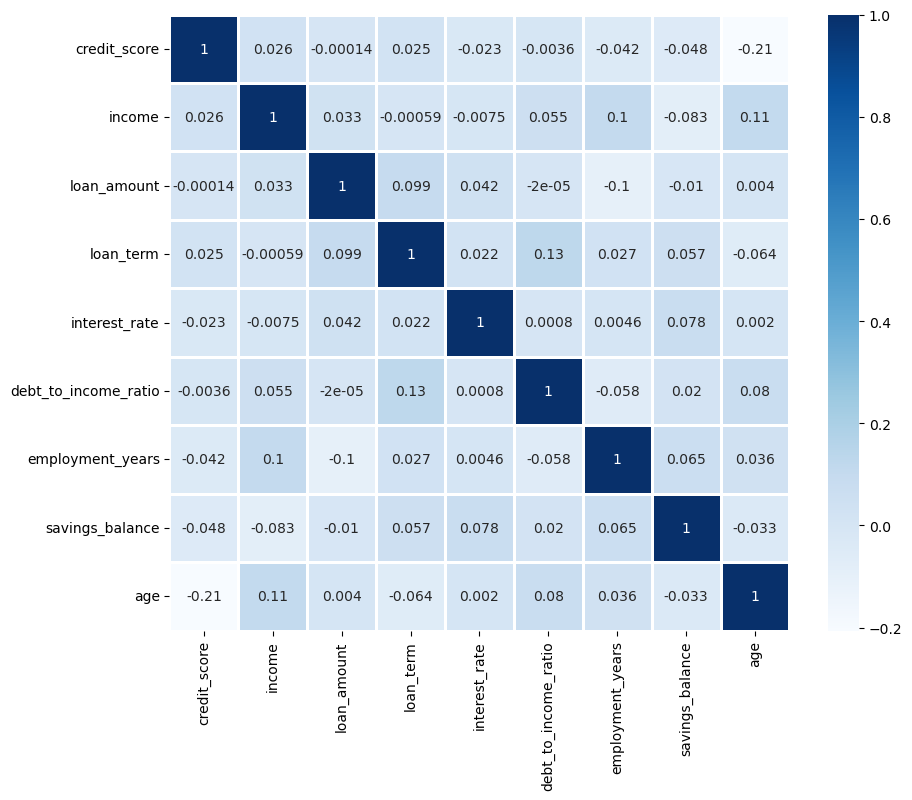

In [9]:
corr_matrix = X.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", linewidths=0.95)

In [11]:
scaler = StandardScaler()

# Fit and transform the training set, and transform the test set
X_scaled = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

In [13]:
import pickle

In [39]:
with open("tree_grid_search.pkl", "rb") as file:
    model = pickle.load(file)

In [41]:
y_pred = model.predict(X_scaled)

# Evaluate the model
mse = mean_squared_error(y, y_pred)  # Mean Squared Error
r2 = r2_score(y, y_pred)  # R-squared Score

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared Score (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.0278
R-squared Score (R²): 0.9641


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

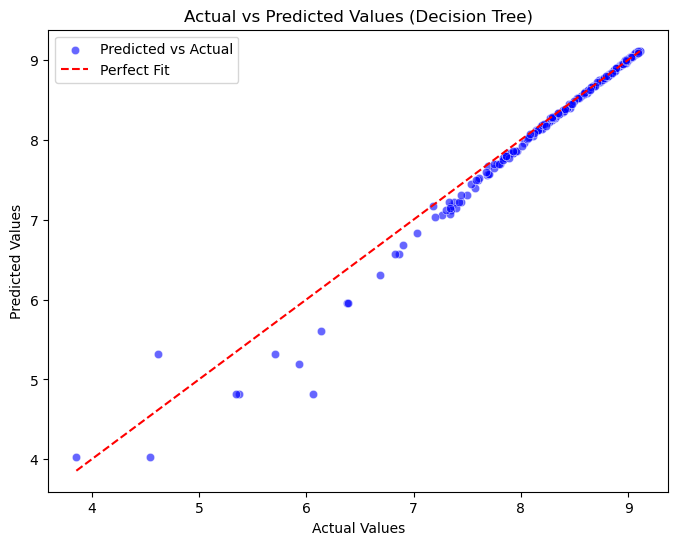

In [45]:
#Create a scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")

# Plot a reference line (y = x) for perfect predictions
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", label="Perfect Fit")

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Decision Tree)")
plt.legend()

# Show the plot
plt.show()

In [49]:
df['predicted_default_risk'] = y_pred

In [51]:
df.head()

,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age,default_risk_score,predicted_default_risk
0,340,31745,8983,48,10.12,18.33,11,91417,56,8341.948454,9.030391
1,439,115081,42051,60,3.33,31.77,6,17127,51,1709.293506,7.226040
2,619,35313,6619,36,9.06,24.29,20,46761,42,8743.629774,9.094970
3,664,72269,19226,48,4.29,12.50,26,64340,36,6190.771456,8.729133
4,564,46292,30476,48,11.15,40.55,20,93831,50,3989.722206,8.249231


In [53]:
df['predicted_default_risk'] = np.exp(df['predicted_default_risk']) - 1

<IPython.core.display.Javascript object>

In [55]:
df.head()

,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age,default_risk_score,predicted_default_risk
0,340,31745,8983,48,10.12,18.33,11,91417,56,8341.948454,8352.127910
1,439,115081,42051,60,3.33,31.77,6,17127,51,1709.293506,1373.767284
2,619,35313,6619,36,9.06,24.29,20,46761,42,8743.629774,8909.357939
3,664,72269,19226,48,4.29,12.50,26,64340,36,6190.771456,6179.366094
4,564,46292,30476,48,11.15,40.55,20,93831,50,3989.722206,3823.684127


In [57]:
df.to_csv("predicted_default_risk.csv", index=False)